<a href="https://colab.research.google.com/github/ranaolwan/CPSC-2376/blob/main/AI_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation and Preprocessing

In [10]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)

# Number of samples
n_samples = 1000

data = {
    'city': np.random.choice(['CityA', 'CityB', 'CityC', 'CityD'], size=n_samples),
    'country': np.random.choice(['CountryX', 'CountryY', 'CountryZ'], size=n_samples),
    'x1': np.random.uniform(1000, 5000, n_samples),  # Example: income
    'x2': np.random.uniform(500, 1500, n_samples),   # Example: housing costs
    'x3': np.random.uniform(100, 500, n_samples),   # Example: transportation
    # ...
    # Add more features up to x55
    'x55': np.random.uniform(100, 1000, n_samples), # Example: utility costs
    'data_quality': np.random.choice([0, 1], size=n_samples, p=[0.4, 0.6])  # Binary target
}

for i in range(1, 56):
    data[f'x{i}'] = np.random.uniform(100, 1000, n_samples)


# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('data.csv', index=False)
print("Mock dataset created and saved as 'data.csv'.")


Mock dataset created and saved as 'data.csv'.


In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer

try:
    # Try to load 'data.csv'
    data = pd.read_csv('data.csv')
except FileNotFoundError:
    # If 'data.csv' is not found, ask for a new file path
    file_path = input("File 'data.csv' not found. Please enter the correct path: ")
    data = pd.read_csv(file_path)  # Load data from the new path

# Check for missing values
print(data.isnull().sum())

# Impute missing numerical data with mean
num_columns = data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
data[num_columns] = imputer_num.fit_transform(data[num_columns])

# Impute missing categorical data with mode
cat_columns = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data[cat_columns] = imputer_cat.fit_transform(data[cat_columns])

print("Missing data handled.")

city            0
country         0
x1              0
x2              0
x3              0
x55             0
data_quality    0
x4              0
x5              0
x6              0
x7              0
x8              0
x9              0
x10             0
x11             0
x12             0
x13             0
x14             0
x15             0
x16             0
x17             0
x18             0
x19             0
x20             0
x21             0
x22             0
x23             0
x24             0
x25             0
x26             0
x27             0
x28             0
x29             0
x30             0
x31             0
x32             0
x33             0
x34             0
x35             0
x36             0
x37             0
x38             0
x39             0
x40             0
x41             0
x42             0
x43             0
x44             0
x45             0
x46             0
x47             0
x48             0
x49             0
x50             0
x51             0
x52       

In [12]:
# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=['city', 'country'], drop_first=True)
print("Categorical columns encoded.")


Categorical columns encoded.


In [13]:
from sklearn.preprocessing import StandardScaler

# Extract the cost-related columns (x1 through x55)
cost_columns = [f'x{i}' for i in range(1, 56)]

# Apply StandardScaler to these columns
scaler = StandardScaler()
data[cost_columns] = scaler.fit_transform(data[cost_columns])

print("Feature scaling applied.")


Feature scaling applied.


Model Training and Hyperparameter Tuning

In [14]:
from sklearn.model_selection import train_test_split

# Define target variable (data_quality) and features (all other columns)
X = data.drop('data_quality', axis=1)
y = data['data_quality']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into train and test sets.")


Data split into train and test sets.


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None]
}

# Apply GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model found by GridSearchCV
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': 10, 'n_estimators': 200}


Model Evaluation


In [16]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

         0.0       0.11      0.01      0.02        86
         1.0       0.55      0.93      0.70       114

    accuracy                           0.54       200
   macro avg       0.33      0.47      0.36       200
weighted avg       0.36      0.54      0.41       200

Accuracy: 0.5350


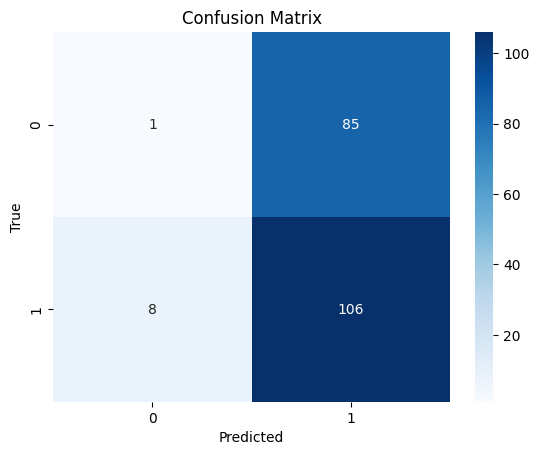

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


AUC Score: 0.4472


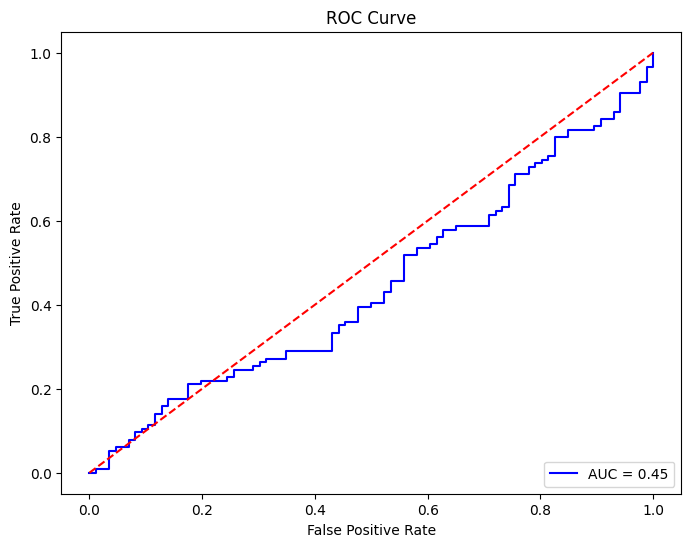

In [18]:
from sklearn.metrics import roc_curve, auc

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test)[:,1])

# Calculate AUC score
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Feature Importance Plot

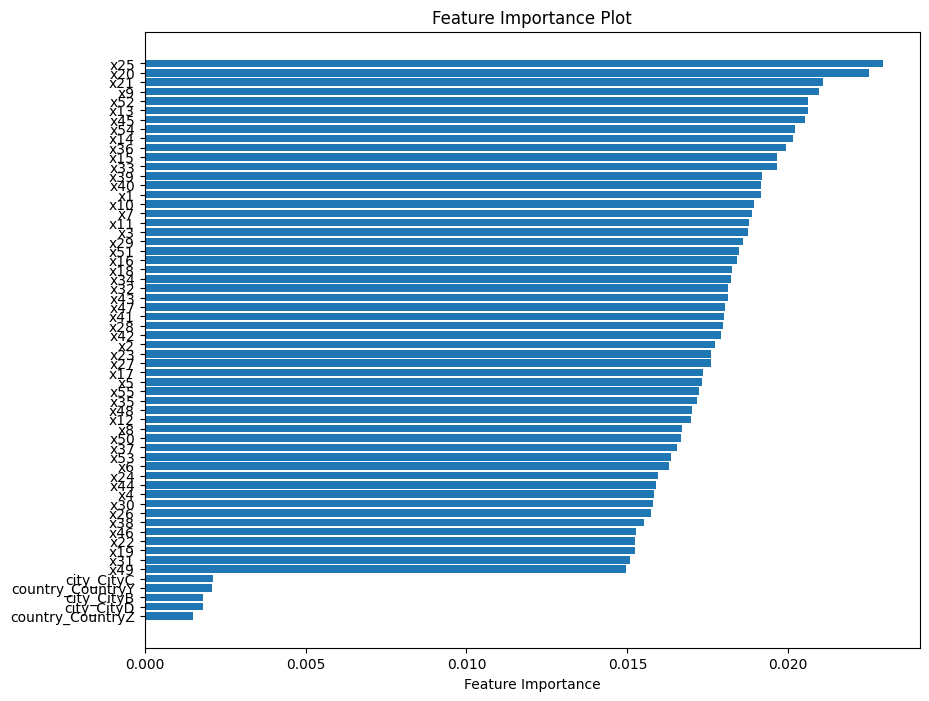

In [19]:
# Get feature importances
importances = best_rf.feature_importances_

# Sort the features by importance
indices = importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()
